# 1. 데이터 준비

In [1]:
#데이터를 DataFrame에 로딩하기 - 데이터가 ''\t'으로 분리된 파일
import pandas as pd
url='https://raw.githubusercontent.com/sehakflower/data/main/titanic.csv'
titanic_df = pd.read_csv(url, sep='\t')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [2]:
# 컬럼명을 소문자로 바꾸기
new_col = [col_name.lower() for col_name in titanic_df.columns]
titanic_df.columns = new_col
titanic_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [3]:
# 분석에 필요한 컬럼만 가져오기
# 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare'
titanic_df1 = titanic_df[['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare']]
titanic_df1

,survived,pclass,name,sex,age,sibsp,parch,fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
151,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,66.6000
152,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,8.0500
153,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,14.5000
154,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,7.3125


## 1-1. 데이터 값을 숫자형으로 변경하기


### [참고] 데이터형을 변환하는 함수
* *pandas*.**to_numeric** (errors='ignore'/'coerce'/'raise')
* *DataFrame*['*column_name*'].**astype**('*type_name*')

In [4]:
titanic_df2 = titanic_df1.apply(pd.to_numeric, errors='coerce')
titanic_df2

,survived,pclass,name,sex,age,sibsp,parch,fare
0,0,3,NaN,NaN,22.0,1,0,7.2500
1,1,1,NaN,NaN,38.0,1,0,71.2833
2,1,3,NaN,NaN,26.0,0,0,7.9250
3,1,1,NaN,NaN,35.0,1,0,53.1000
4,0,3,NaN,NaN,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
151,1,1,NaN,NaN,22.0,1,0,66.6000
152,0,3,NaN,NaN,55.5,0,0,8.0500
153,0,3,NaN,NaN,40.5,0,2,14.5000
154,0,3,NaN,NaN,NaN,0,0,7.3125


In [5]:
# 1. sex열을 gender로 바꾸고 여성은 0, 남성은 1로 바꾸기
# gender 열 생성, sex 열 삭제
temp = []
for data in titanic_df1['sex']:
    temp.append(0) if data == 'female' else temp.append(1)
titanic_df1['gender'] = temp
titanic_df1.drop(columns='sex', inplace=True)
titanic_df1

C:\Users\User\AppData\Local\Temp\ipykernel_13040\1905584349.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['gender'] = temp
C:\Users\User\AppData\Local\Temp\ipykernel_13040\1905584349.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.drop(columns='sex', inplace=True)


,survived,pclass,name,age,sibsp,parch,fare,gender
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
151,1,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000,0
152,0,3,"Meo, Mr. Alfonzo",55.5,0,0,8.0500,1
153,0,3,"van Billiard, Mr. Austin Blyler",40.5,0,2,14.5000,1
154,0,3,"Olsen, Mr. Ole Martin",NaN,0,0,7.3125,1


In [6]:
# 2. 호칭을 숫자형으로 바꾸기 (문자형 데이터를 명목 데이터화)
# name 내 호칭을 기반으로 승객 유형 나누기

In [7]:
a = 'Williams, Mr. Charles Duane'
b = a.split(',')[1].split('.')[0].strip()
b

'Mr'

In [8]:
#호칭에 해당하는 부분 추출하는 공식
func = lambda x : x.split(',')[1].split('.')[0].strip()
titanic_df1['title'] = titanic_df1['name'].map(func)
titanic_df1['title'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_13040\3036265611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['title'] = titanic_df1['name'].map(func)


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev'], dtype=object)

* map : 하나의 컬럼에만 적용
* apply : 다중 컬럼 적용 가능

In [9]:
# Mr, Mrs, Miss는 그대로 사용, 나머지 3개 호칭을 title 열의 Special로 대체
special = ['Master', 'Don', 'Rev']
for x in special:
    titanic_df1['title'] = titanic_df1['title'].replace(x, 'Special')
# titanic_df1['title'].unique()
    
# 숫자형으로 만드는 함수 만들기 (special호칭 여부만 반영)
# special_title 열 만들어서 special은 1, 나머지는 0으로 바꾸기

# temp = []
# for data in titanic_df1['title']:
#     temp.append(1) if data == 'Special' else temp.append(0)
# titanic_df1['special_title'] = temp
# titanic_df1.drop(columns='title', inplace=True)
# titanic_df1

# lambda로도 표현 해보기
def con_title(x):
    return 1 if x == 'Special' else 0

titanic_df1['special_title'] = titanic_df1['title'].apply(con_title)

titanic_df1.drop('title', axis=1, inplace=True)
titanic_df1.drop('name', axis=1, inplace=True)
titanic_df1


C:\Users\User\AppData\Local\Temp\ipykernel_13040\217745167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['title'] = titanic_df1['title'].replace(x, 'Special')
C:\Users\User\AppData\Local\Temp\ipykernel_13040\217745167.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['special_title'] = titanic_df1['title'].apply(con_title)
C:\Users\User\AppData\Local\Temp\ipykernel_13040\217745167.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,survived,pclass,age,sibsp,parch,fare,gender,special_title
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...
151,1,1,22.0,1,0,66.6000,0,0
152,0,3,55.5,0,0,8.0500,1,0
153,0,3,40.5,0,2,14.5000,1,0
154,0,3,NaN,0,0,7.3125,1,0


## 1-2. 컬럼 정보로부터 필요 정보 추출하여 추가하기

In [10]:
# 3. avgfare 열 만들어 1인당 평균 탑승 요금 넣기
# 3-1. sibpar 열 만들어 동반자 수 더한 값 넣기
# sibsp : 형제자매 동반, parch : 부모 동반
titanic_df1['sibpar'] = titanic_df1['sibsp'] + titanic_df1['parch']
# 사용하지 않는 sibsp, parch 열 삭제하기
titanic_df1.drop(['sibsp', 'parch'],axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13040\2853138929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['sibpar'] = titanic_df1['sibsp'] + titanic_df1['parch']
C:\Users\User\AppData\Local\Temp\ipykernel_13040\2853138929.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.drop(['sibsp', 'parch'],axis=1, inplace=True)


In [11]:
titanic_df1

,survived,pclass,age,fare,gender,special_title,sibpar
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,1
2,1,3,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,0
...,...,...,...,...,...,...,...
151,1,1,22.0,66.6000,0,0,1
152,0,3,55.5,8.0500,1,0,0
153,0,3,40.5,14.5000,1,0,2
154,0,3,NaN,7.3125,1,0,0


In [12]:
# 3-2. avgfare 열 만들어 1인당 평균 탑승 요금 넣기
titanic_df1['n_family'] = titanic_df1['sibpar'] + 1
titanic_df1['avgfare'] = titanic_df1['fare'] / titanic_df1['n_family']
titanic_df1

C:\Users\User\AppData\Local\Temp\ipykernel_13040\370797596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['n_family'] = titanic_df1['sibpar'] + 1
C:\Users\User\AppData\Local\Temp\ipykernel_13040\370797596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['avgfare'] = titanic_df1['fare'] / titanic_df1['n_family']


,survived,pclass,age,fare,gender,special_title,sibpar,n_family,avgfare
0,0,3,22.0,7.2500,1,0,1,2,3.625000
1,1,1,38.0,71.2833,0,0,1,2,35.641650
2,1,3,26.0,7.9250,0,0,0,1,7.925000
3,1,1,35.0,53.1000,0,0,1,2,26.550000
4,0,3,35.0,8.0500,1,0,0,1,8.050000
...,...,...,...,...,...,...,...,...,...
151,1,1,22.0,66.6000,0,0,1,2,33.300000
152,0,3,55.5,8.0500,1,0,0,1,8.050000
153,0,3,40.5,14.5000,1,0,2,3,4.833333
154,0,3,NaN,7.3125,1,0,0,1,7.312500


In [13]:
# n_family 열 만들어 동반자에 1을 더하여 0으로 나누어지지 않도록 함
# 1인당 평균 탑승 요금

# 필요 없는 열 삭제하기
titanic_df1.drop(['fare','sibpar'], axis=1, inplace=True)
titanic_df1

C:\Users\User\AppData\Local\Temp\ipykernel_13040\3079894997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.drop(['fare','sibpar'], axis=1, inplace=True)


,survived,pclass,age,gender,special_title,n_family,avgfare
0,0,3,22.0,1,0,2,3.625000
1,1,1,38.0,0,0,2,35.641650
2,1,3,26.0,0,0,1,7.925000
3,1,1,35.0,0,0,2,26.550000
4,0,3,35.0,1,0,1,8.050000
...,...,...,...,...,...,...,...
151,1,1,22.0,0,0,2,33.300000
152,0,3,55.5,1,0,1,8.050000
153,0,3,40.5,1,0,3,4.833333
154,0,3,NaN,1,0,1,7.312500


## 1-3. 결측치 제거

In [14]:
#age에는 NaN 값이 있으므로 이를 삭제한 데이터를 분석에 사용
titanic_df1.info()
# titanic_df1.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       156 non-null    int64  
 1   pclass         156 non-null    int64  
 2   age            126 non-null    float64
 3   gender         156 non-null    int64  
 4   special_title  156 non-null    int64  
 5   n_family       156 non-null    int64  
 6   avgfare        156 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 8.7 KB


In [15]:
titanic_df1 = titanic_df1.dropna()
titanic_df1

,survived,pclass,age,gender,special_title,n_family,avgfare
0,0,3,22.0,1,0,2,3.625000
1,1,1,38.0,0,0,2,35.641650
2,1,3,26.0,0,0,1,7.925000
3,1,1,35.0,0,0,2,26.550000
4,0,3,35.0,1,0,1,8.050000
...,...,...,...,...,...,...,...
150,0,2,51.0,1,1,1,12.525000
151,1,1,22.0,0,0,2,33.300000
152,0,3,55.5,1,0,1,8.050000
153,0,3,40.5,1,0,3,4.833333


## 1-5. 최종 데이터 정리
* 컬럼명 변경하기
  - 'gender':'sex', 'special_title':'title', 'avgfare':'fare', 'n_family':'num_family'
* 컬럼 순서 다시 정하기 
  - 'survived', 'pclass', 'sex', 'age', 'title', 'fare', 'num_family'

In [16]:
titanic_df1.rename(columns={'gender':'sex', 'special_title':'title', 'avgfare':'fare', 'n_family':'num_family'}, inplace=True)
titanic_df1 = titanic_df1[['survived', 'pclass', 'sex', 'age', 'title', 'fare', 'num_family']]
titanic_df1

C:\Users\User\AppData\Local\Temp\ipykernel_13040\604024466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.rename(columns={'gender':'sex', 'special_title':'title', 'avgfare':'fare', 'n_family':'num_family'}, inplace=True)


,survived,pclass,sex,age,title,fare,num_family
0,0,3,1,22.0,0,3.625000,2
1,1,1,0,38.0,0,35.641650,2
2,1,3,0,26.0,0,7.925000,1
3,1,1,0,35.0,0,26.550000,2
4,0,3,1,35.0,0,8.050000,1
...,...,...,...,...,...,...,...
150,0,2,1,51.0,1,12.525000,1
151,1,1,0,22.0,0,33.300000,2
152,0,3,1,55.5,0,8.050000,1
153,0,3,1,40.5,0,4.833333,3


# 2. Data Mining으로 생존률 예측

In [17]:
#사이킷런 라이브러리 설치
!pip3 install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


## 2-1. 학습용 데이터와 테스트용 데이터 분할

* *ndarray* = *DataFrame*.**values**
  - DataFrame의 값을 ndarray로 변환하기

In [18]:
# 데이터프레임에서 값만 넘파이로 가져와서 분석에 적용
raw = titanic_df1
np_raw = titanic_df1.values
type(np_raw)

numpy.ndarray

In [19]:
# 학습용 데이터 100개, 이후 데이터는 테스트 데이터로 분할
train = np_raw[:100]
test = np_raw[100:]
# 첫번째 값이 survived로 정답에 해당하는 값임
train_y = [ row[0] for row in train ]
train_x = [ row[1:] for row in train ]
test_y = [ row[0] for row in test ]
test_x = [ row[1:] for row in test ]

In [20]:
print(test_x)

[array([ 3.    ,  1.    , 24.    ,  0.    ,  7.1417,  1.    ]), array([ 3.   ,  1.   , 45.   ,  0.   ,  6.975,  1.   ]), array([ 3.    ,  1.    , 33.    ,  0.    ,  7.8958,  1.    ]), array([ 3.  ,  1.  , 20.  ,  0.  ,  7.05,  1.  ]), array([ 3.  ,  0.  , 47.  ,  0.  ,  7.25,  2.  ]), array([ 2.,  0., 29.,  0., 13.,  2.]), array([ 2.,  1., 25.,  0., 13.,  1.]), array([ 2.    ,  1.    , 23.    ,  0.    , 15.0458,  1.    ]), array([ 1.    ,  0.    , 19.    ,  0.    ,  8.7611,  3.    ]), array([ 1.  ,  1.  , 37.  ,  0.  , 26.55,  2.  ]), array([ 3.    ,  1.    , 16.    ,  0.    ,  9.2167,  1.    ]), array([ 1. ,  1. , 24. ,  0. , 79.2,  1. ]), array([ 3.  ,  0.  , 22.  ,  0.  ,  7.75,  1.  ]), array([ 3.   ,  0.   , 24.   ,  0.   ,  7.925,  2.   ]), array([ 3.  ,  1.  , 19.  ,  0.  ,  6.75,  1.  ]), array([ 2. ,  1. , 18. ,  0. , 11.5,  1. ]), array([ 2.  ,  1.  , 19.  ,  0.  , 12.25,  3.  ]), array([ 3.    ,  1.    , 27.    ,  0.    ,  7.7958,  1.    ]), array([3.   , 0.   , 9.   , 0.   

## 2-2. Decision Tree

* 어떤 규칙을 하나의 트리(tree) 형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결
  - 규칙은 ‘if-else’ 문으로 표현이 가능
  - 트리는 일종의 경로를 표현하는 것
  - 트리 구조의 마지막 노드에는 분류 문제에서 클래스, 회귀 문제에서는 예측치가 들어감


In [21]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


### [참고] Decision Tree Visualizer 'Graphviz' 설치 및 설정

1. 다음 경로에서 파일을 다운받고 설치하면 됩니다.  
https://graphviz.org/download/   
여기서는 graphviz-8.0.5 (64-bit) EXE installer [sha256] 항목을 설치하였다. 

2.아나콘다설치후 주피터노트북을 실행한다면 아나콘다 프롬프트쉘에서 conda install python-graphviz 입력하여 실행한다.

3. 환경변수에서 path도 함께 설정해주어야 합니다.   
(1) 윈도우 검색란에 '환경'이라고 검색하고 Enter를 누르면 시스템 속성 대화상자가 나타난다.  
(2) 하단의 [환경변수] 단추를 클릭하고 상단 목록에서 [path]항목을 선택한후 [편집] 단추를 클릭한다.   
(3) 환경변수 편집 대화상자가 나타나면 [새로 만들기] 단추를 눌러 다음의 두 개의 경로를 추가한후 확인을 클릭한다.     

pc에 대한 사용자 변수창 path변수에 아래를 추가한다.
> C:\Program Files\Graphviz\bin    

시스템 변수창 path에 아래를 추가한다.
> C:\Program Files\Graphviz\bin\dot.exe    

(4) 저장후 주피터 노트북을 재실행한 후 코드를 실행하면 오류 없이 잘 실행되는 것을 확인할수 있다. 

### 2-2-1. DecisionTreeClassifier 모델 생성 및 학습
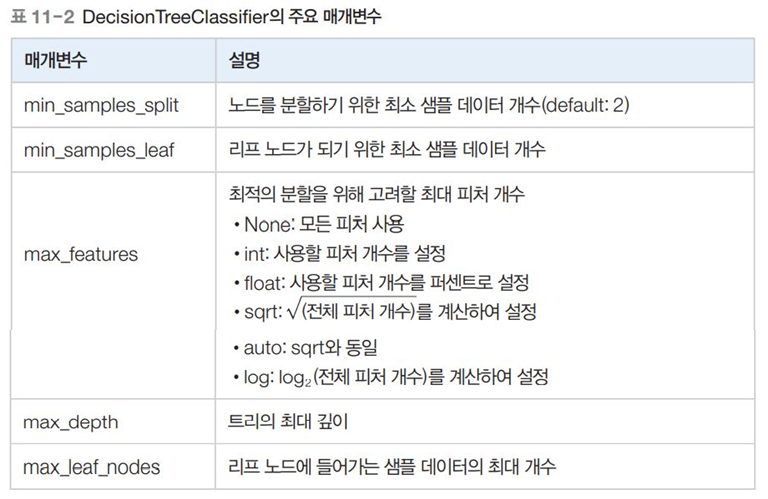

* 파라미터  
'criterion': ['gini', 'entropy'],  
              'max_depth': [3, 5, 7, 9],  
              'min_samples_split': [x for x in range(3, 15,2)],  
                 'min_samples_leaf': [x for x in range(1, 15,2)],  
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],    
              'splitter': ['best', 'random']}  

In [22]:
from sklearn.tree import DecisionTreeClassifier
# 모델 생성
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
# 모델 훈련
model.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

### 2-2-2. 학습 결과 검증 (확인)

In [23]:
# 훈련 결과 확인하기
model.score(train_x, train_y), model.score(test_x, test_y)

(0.84, 0.8846153846153846)

### 생성된 Decision Tree Model Visualization

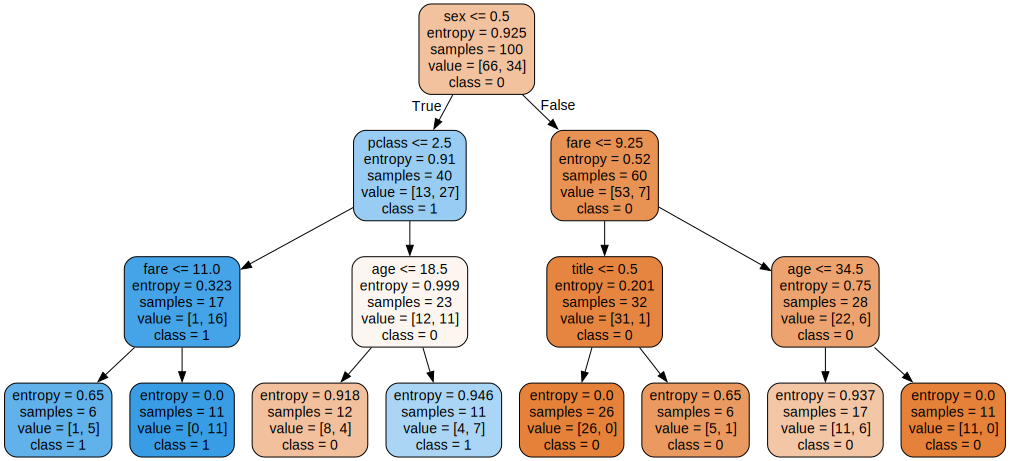

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(
 model,
 out_file="titanic.dot",
 feature_names=['pclass', 'sex', 'age', 'title', 'fare', 'num_family'],
 class_names=['0','1'],
 rounded=True,
 filled=True
)
import graphviz
with open("titanic.dot") as f:
 dot_graph=f.read()
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='titanic_tree', directory='image/decision_trees', cleanup=True)
dot

In [25]:
# 예측 수행
pred_y = model.predict(test_x)
pred_y
# 분류 정확도 측정
from sklearn.metrics import accuracy_score
print(f'test 정확도 : {accuracy_score(test_y, pred_y)*100}')

test 정확도 : 88.46153846153845


### Confusion Matrix (혼동행렬)

* 분류 모델 성능 평가 지표
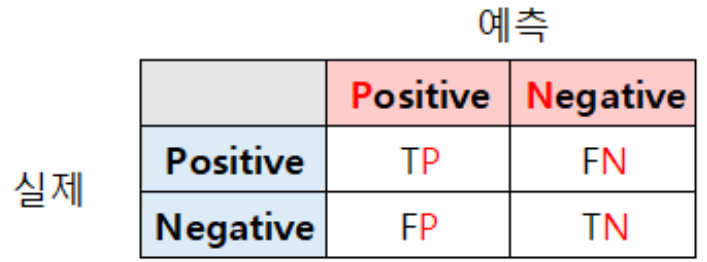

* Accuracy  (정확도) = ( TP + TN ) / ( TP + FP + TN + FN )
* Precision (정밀도) = TP / ( TP + FP )
* Recall    (재현률) = TP / ( TP + FN )

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_y)


array([[18,  1],
       [ 2,  5]], dtype=int64)

### 2-2-3. 예측 수행

In [27]:
feature_names=['pclass', 'sex', 'age', 'title', 'fare', 'num_family']
Tom = [1,1,33,1,50,4]
model.predict_proba([Tom])

array([[0.64705882, 0.35294118]])

In [28]:
Jane = [2, 1, 20, 0, 10, 1]
model.predict_proba([Jane])

array([[0.64705882, 0.35294118]])

## 3. LogisticRegression (로지스틱 회귀분석)

### 3-1. 기존 데이터 이용 (표준화하지 않음)

In [29]:
# 모델 생성 -> 모델 학습
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(train_x, train_y)

LogisticRegression(C=10.0, random_state=13, solver='liblinear')

In [30]:
# 모델 학습 성능 확인
pred = log_reg.predict(train_x)
accuracy_score(train_y, pred)

0.78

In [31]:
# 테스트 데이터로 모델 검증
pred = log_reg.predict(test_x)
accuracy_score(test_y, pred)

0.8846153846153846

In [32]:
#혼동행렬
confusion_matrix(test_y, pred)

array([[18,  1],
       [ 2,  5]], dtype=int64)

### 3-2. 표준화한 데이터 이용하기

In [33]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


### 3-2-1. 데이터 범위 확인

<Axes: >

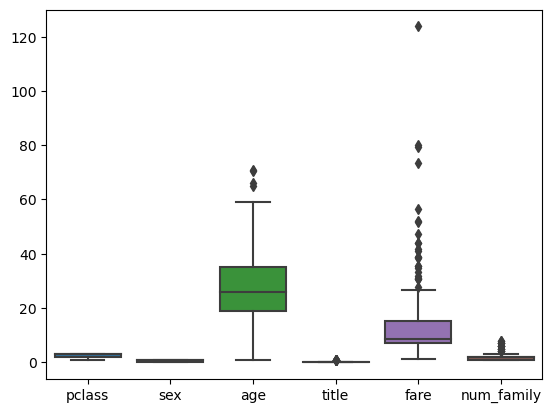

In [34]:
import seaborn as sns
sns.boxplot(data = titanic_df1[['pclass', 'sex', 'age', 'title', 'fare', 'num_family']])

* Scaler의 유형
  - StandardScaler : 평균 0, 표준편차 1 기준 정규화
    * 각 열의 feature 값의 평균을 0으로 잡고, 표준편차를 1로 간주하여 정규화
  - MinMaxScaler : 최솟값 0, 최댓값 1 기준 정규화
    * 각 feature의 최솟값과 최댓값을 기준으로 0~1 구간 내에 균등하게 값을 배정
  - RobustScaler : 중앙값 0, 사분위수 IQR 기준 정규화
    * RobustScaler는 각 feature의 median(Q2)에 해당하는 데이터를 0으로 잡고,  
      Q1, Q3 사분위수와의 IQR 차이 만큼을 기준으로 정규화를 진행합니다.
    * 공식 : (데이터 값 - Q2) / (Q3 - Q1)

In [35]:
from sklearn.preprocessing import StandardScaler
SS_model = StandardScaler()
SS_model.fit(titanic_df1)
t_SS = SS_model.transform(titanic_df1)
t_SS_pd = pd.DataFrame(t_SS, columns=titanic_df1.columns)
t_SS_pd

,survived,pclass,sex,age,title,fare,num_family
0,-0.694516,0.814941,0.771321,-0.421929,-0.293610,-0.707577,-0.096803
1,1.439851,-1.659337,-1.296476,0.677291,-0.293610,1.041150,-0.096803
2,1.439851,0.814941,-1.296476,-0.147124,-0.293610,-0.472714,-0.677621
3,1.439851,-1.659337,-1.296476,0.471187,-0.293610,0.544571,-0.096803
4,-0.694516,0.814941,0.771321,0.471187,-0.293610,-0.465886,-0.677621
...,...,...,...,...,...,...,...
121,-0.694516,-0.422198,0.771321,1.570407,3.405877,-0.221465,-0.677621
122,1.439851,-1.659337,-1.296476,-0.421929,-0.293610,0.913251,-0.096803
123,-0.694516,0.814941,0.771321,1.879563,-0.293610,-0.465886,-0.677621
124,-0.694516,0.814941,0.771321,0.849044,-0.293610,-0.641578,0.484015


<Axes: >

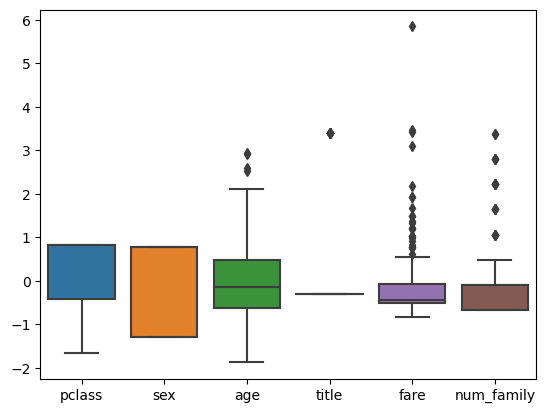

In [36]:
sns.boxplot(data = t_SS_pd[['pclass', 'sex', 'age', 'title', 'fare', 'num_family']])

### 3-2-2. 데이터 준비

In [37]:
# np_data = t_SS_pd.values
# x = [ row[1:] for row in np_data]
# y = [ row[0] for row in np_data]

In [38]:
np_data = t_SS_pd.values
x = titanic_df1['survived']
y = t_SS_pd[['pclass', 'sex', 'age', 'title', 'fare', 'num_family']]

### 3-2-3. 학습용, 테스트용 데이터 준비

* *sklearn.model_selection*.**train_test_split**(x, y, test_size= , random_state=)

In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=13)

In [40]:
print(train_y)

       pclass       sex       age     title      fare  num_family
103  0.814941  0.771321 -0.559332 -0.293610 -0.520506   -0.677621
64  -0.422198 -1.296476 -0.765436 -0.293610 -0.332069   -0.677621
44   0.814941  0.771321 -1.177643  3.405877 -0.585366    3.388104
95  -0.422198  0.771321 -0.490631 -0.293610  0.432601    0.484015
9    0.814941 -1.296476 -1.658552 -0.293610 -0.601524    0.484015
..        ...       ...       ...       ...       ...         ...
102  0.814941  0.771321  0.333785 -0.293610 -0.474309   -0.677621
16   0.814941 -1.296476  0.196382 -0.293610 -0.413998   -0.096803
74  -1.659337  0.771321  2.944433 -0.293610  0.987216   -0.677621
48   0.814941  0.771321 -1.658552  3.405877 -0.651592    2.226468
82   0.814941  0.771321 -0.009722 -0.293610 -0.474309   -0.677621

[100 rows x 6 columns]


In [41]:
log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)

# train_y = [1 if i > 0 else 0 for i in train_y]
# test_y = [1 if i > 0 else 0 for i in test_y]

log_reg.fit(train_x, train_y)
pred = log_reg.predict(train_x)
accuracy_score(train_y, pred)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 3-3-3. MMS 기반 훈련

In [42]:
from sklearn.preprocessing import MinMaxScaler
MMS_model = MinMaxScaler()
MMS_model.fit(titanic_df1)
t_MMS = MMS_model.transform(titanic_df1)
t_MMS_pd = pd.DataFrame(t_MMS, columns=titanic_df1.columns)
t_MMS_pd

,survived,pclass,sex,age,title,fare,num_family
0,0.0,1.0,1.0,0.301696,0.0,0.020329,0.142857
1,1.0,0.0,0.0,0.529714,0.0,0.281416,0.142857
2,1.0,1.0,0.0,0.358700,0.0,0.055394,0.000000
3,1.0,0.0,0.0,0.486960,0.0,0.207276,0.142857
4,0.0,1.0,1.0,0.486960,0.0,0.056413,0.000000
...,...,...,...,...,...,...,...
121,0.0,0.5,1.0,0.714978,1.0,0.092906,0.000000
122,1.0,0.0,0.0,0.301696,0.0,0.262320,0.142857
123,0.0,1.0,1.0,0.779108,0.0,0.056413,0.000000
124,0.0,1.0,1.0,0.565341,0.0,0.030182,0.285714


In [43]:
# input data와 정답 data 분리
x = titanic_df1['survived']
y = t_MMS_pd[['pclass', 'sex', 'age', 'title', 'fare', 'num_family']]

# 학습용 데이터와 테스트용 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=13)

# Logistic Regression 모델 생성, 학습
log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)

log_reg.fit(train_x, train_y)
pred = log_reg.predict(train_x)
accuracy_score(train_y, pred)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [44]:
# 검증용 데이터 성능 평가
pred = log_reg.predict(test_x)
accuracy_score(test_y, pred)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# 혼동행렬
confusion_matrix(test_y, pred)

### 3-3-4. Standatd Scaler 기반